This notebook is used to test the system simulator.

# Import libraries

In [1]:
from regelum.scenario import Scenario
from regelum.simulator import CasADi
import numpy as np
from tqdm.notebook import tqdm

import sys
sys.path.append('../')

from src.system import HydraulicSystem
from src.policy import PDController

In [2]:
from regelum.callback import (
    ScenarioStepLogger,
    # HistoricalDataCallback,
)
from src.callback import HistoricalDataCallback

from regelum import set_ipython_env
%matplotlib inline
callbacks = [ScenarioStepLogger, HistoricalDataCallback]
ScenarioStepLogger.cooldown = 0.01
callbacks = set_ipython_env(callbacks=callbacks, interactive=True)

# Run simulation

Instantiating Simulator, Policy, Scenario and run it

In [3]:
max_step = 1e-7
sampling_time = 1e-3 # 1e-3
final_time = 10e-3 # 10e-3

# Define the initial state (initial position of the kinematic point).
p_atm = 1e5
initial_state = np.array([1e3, 0, 0, p_atm, p_atm])

# Initialize the kinematic point system.
hydr_system = HydraulicSystem(
    init_state=initial_state
)

# Instantiate a simulator for the hydraulic system
simulator = CasADi(
    system=hydr_system, 
    state_init=initial_state, 
    time_final=final_time, 
    max_step=max_step,
    # rtol=1e-10,
    # atol=1e-10,
)

pd_policy = PDController(
    system=hydr_system,
    sampling_time=sampling_time,
)

scenario = Scenario(
    policy=PDController(
        system=hydr_system,
        sampling_time=sampling_time
    ),
    simulator=simulator,
    sampling_time=sampling_time,
    N_episodes=1,
    N_iterations=1,
)

scenario.run()

[22:07:58] INFO     runn. objective: 0.00, state est.: [0. 0.], observation: [0. 0.], action:      ]8;id=441292;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=461982;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    [20.], value: 0.0000, time: 0.0000 (0.0%), episode: 1/1, iteration: 1/1                        

[22:08:00] INFO     runn. objective: 0.00, state est.: [  0.22 432.48], observation: [  0.22       ]8;id=194934;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=709527;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    432.48], action: [20.], value: 0.0000, time: 0.0010 (10.0%), episode: 1/1,                     
                    iteration: 1/1                                                                                 

[22:08:03] INFO     runn. objective: 0.00, state est.: [  0.79 694.23], observation: [  0.79       ]8;id=651568;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=598955;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    694.23], action: [14.67], value: 0.0000, time: 0.0020 (20.0%), episode: 1/1,                   
                    iteration: 1/1                                                                                 

[22:08:05] INFO     runn. objective: 0.00, state est.: [  1.51 738.48], observation: [  1.51       ]8;id=966195;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=850827;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    738.48], action: [5.3], value: 0.0000, time: 0.0030 (30.0%), episode: 1/1,                     
                    iteration: 1/1                                                                                 

[22:08:07] INFO     runn. objective: 0.00, state est.: [  2.15 563.61], observation: [  2.15       ]8;id=177919;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=970854;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    563.61], action: [-3.1], value: 0.0000, time: 0.0040 (40.0%), episode: 1/1,                    
                    iteration: 1/1                                                                                 

[22:08:09] INFO     runn. objective: 0.00, state est.: [  2.56 275.13], observation: [  2.56       ]8;id=791095;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=818275;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    275.13], action: [-8.42], value: 0.0000, time: 0.0050 (50.0%), episode: 1/1,                   
                    iteration: 1/1                                                                                 

[22:08:12] INFO     runn. objective: 0.00, state est.: [2.68 0.3 ], observation: [2.68 0.3 ],      ]8;id=318909;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=582129;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-9.96], value: 0.0000, time: 0.0060 (60.0%), episode: 1/1, iteration:                 
                    1/1                                                                                            

[22:08:14] INFO     runn. objective: 0.00, state est.: [2.68 0.78], observation: [2.68 0.78],      ]8;id=161203;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=678883;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-9.98], value: 0.0000, time: 0.0070 (70.0%), episode: 1/1, iteration:                 
                    1/1                                                                                            

[22:08:16] INFO     runn. objective: 0.00, state est.: [2.68 0.53], observation: [2.68 0.53],      ]8;id=912697;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=235568;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-9.99], value: 0.0000, time: 0.0080 (80.0%), episode: 1/1, iteration:                 
                    1/1                                                                                            

[22:08:18] INFO     runn. objective: 0.00, state est.: [2.68 0.03], observation: [2.68 0.03],      ]8;id=180081;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=246792;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-10.], value: 0.0000, time: 0.0090 (90.0%), episode: 1/1, iteration:                  
                    1/1                                                                                            

[22:08:21] INFO     runn. objective: 0.00, state est.: [2.68 1.6 ], observation: [2.68 1.6 ],      ]8;id=177968;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=42058;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-10.02], value: 0.0000, time: 0.0100 (100.0%), episode: 1/1,                          
                    iteration: 1/1                                                                                 

,time,running_objective,current_value,episode_id,iteration_id,throttle action [µm],jet length [mm],jet velocity [mm/s]
0,0.000000,0,0.0,1,1,20.000000,0.000000,0.000000
1,0.001000,0,0.0,1,1,20.000000,0.217593,432.482033
2,0.002000,0,0.0,1,1,14.672232,0.791817,694.231121
3,0.003000,0,0.0,1,1,5.301812,1.510236,738.475859
4,0.004000,0,0.0,1,1,-3.101204,2.154485,563.610518
5,0.005000,0,0.0,1,1,-8.419015,2.562195,275.134635
6,0.006000,0,0.0,1,1,-9.962310,2.680517,0.298626
7,0.007000,0,0.0,1,1,-9.976768,2.681626,0.777985
8,0.008000,0,0.0,1,1,-9.990397,2.682671,0.528241
9,0.009000,0,0.0,1,1,-10.002892,2.683629,0.031764


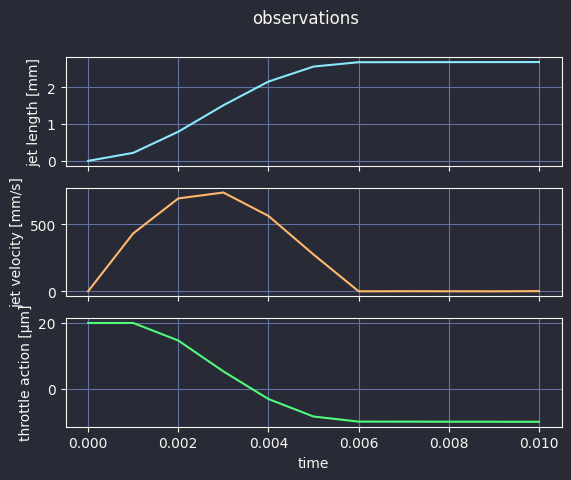

In [5]:
display(callbacks[1].data)
callbacks[1].plot(name="observations");